# RFM Analysis

### RFM analysis is used to comprehend and segment customers based on their purchasing habits. RFM stands for recency, frequency, and monetary value, three critical measures that give information on a company’s customer engagement, loyalty, and value

## Analyzing RFM helps businesses prioritize their marketing strategies, such as targeting high-value customers with special offers, re-engaging churning customers, or enticing new customers to make additional purchases.

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
df=pd.read_csv("rfm_data.CSV")

In [43]:
df

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location
0,8814,2023-04-11,943.31,Product C,890075,Tokyo
1,2188,2023-04-11,463.70,Product A,176819,London
2,4608,2023-04-11,80.28,Product A,340062,New York
3,2559,2023-04-11,221.29,Product A,239145,London
4,9482,2023-04-11,739.56,Product A,194545,Paris
...,...,...,...,...,...,...
995,2970,2023-06-10,759.62,Product B,275284,London
996,6669,2023-06-10,941.50,Product C,987025,New York
997,8836,2023-06-10,545.36,Product C,512842,London
998,1440,2023-06-10,729.94,Product B,559753,Paris


In [44]:
df.shape

(1000, 6)

In [45]:
df.size

6000

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerID          1000 non-null   int64  
 1   PurchaseDate        1000 non-null   object 
 2   TransactionAmount   1000 non-null   float64
 3   ProductInformation  1000 non-null   object 
 4   OrderID             1000 non-null   int64  
 5   Location            1000 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 47.0+ KB


In [47]:
df.isnull().sum()

CustomerID            0
PurchaseDate          0
TransactionAmount     0
ProductInformation    0
OrderID               0
Location              0
dtype: int64

In [48]:
df.describe()

,CustomerID,TransactionAmount,OrderID
count,1000.000000,1000.00000,1000.000000
mean,5554.789000,513.67781,554071.398000
std,2605.014863,286.09870,264695.448814
min,1011.000000,12.13000,100096.000000
25%,3273.000000,257.12000,313152.000000
50%,5538.000000,523.56500,564671.500000
75%,7821.750000,759.86000,783052.250000
max,9991.000000,999.44000,999695.000000


need to change the data type of purchaseDate from object to date time

In [49]:
from datetime import datetime
df['PurchaseDate']=pd.to_datetime(df['PurchaseDate'])

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   CustomerID          1000 non-null   int64         
 1   PurchaseDate        1000 non-null   datetime64[ns]
 2   TransactionAmount   1000 non-null   float64       
 3   ProductInformation  1000 non-null   object        
 4   OrderID             1000 non-null   int64         
 5   Location            1000 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 47.0+ KB


# Calculating RFM Values 

### calculating Recency value

- Recency in the sense of RFM value means It tells us about the data which can be a purchase made by a customer from the business

In [51]:
df.columns

Index(['CustomerID', 'PurchaseDate', 'TransactionAmount', 'ProductInformation',
       'OrderID', 'Location'],
      dtype='object')

In [52]:
df['Recency']=(datetime.now().date() - df['PurchaseDate'].dt.date).dt.days

- the recency for each customer is calculated by counting the number of days between the current date and the last Purchase Date

### Frequency value calculation

In [53]:
frequency_data = df.groupby('CustomerID')['OrderID'].count().reset_index()
frequency_data.rename(columns= {'OrderID': 'Frequency'}, inplace = True)
df = df.merge(frequency_data, on = 'CustomerID', how = 'left')

-The “Frequency” is then calculated by grouping the data by ‘CustomerID’ and calculating the number of orders for each customer

### Monetory value calculation

In [54]:
monetary_data = df.groupby('CustomerID')['TransactionAmount'].sum().reset_index()
monetary_data.rename(columns={'TransactionAmount': 'MonetaryValue'}, inplace = True)
df = df.merge(monetary_data, on = 'CustomerID', how = 'left')

also Monetory value is calculated by grouping the data by ‘CustomerID’ and summing the transaction amounts for each customer.

In [55]:
df

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency,MonetaryValue
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,300,1,943.31
1,2188,2023-04-11,463.70,Product A,176819,London,300,1,463.70
2,4608,2023-04-11,80.28,Product A,340062,New York,300,1,80.28
3,2559,2023-04-11,221.29,Product A,239145,London,300,1,221.29
4,9482,2023-04-11,739.56,Product A,194545,Paris,300,1,739.56
...,...,...,...,...,...,...,...,...,...
995,2970,2023-06-10,759.62,Product B,275284,London,240,1,759.62
996,6669,2023-06-10,941.50,Product C,987025,New York,240,1,941.50
997,8836,2023-06-10,545.36,Product C,512842,London,240,1,545.36
998,1440,2023-06-10,729.94,Product B,559753,Paris,240,1,729.94


### RFM score calculation

In [56]:
recency_scores = [5, 4, 3, 2, 1]
frequency_scores = [1, 2, 3, 4, 5]
monetary_scores = [1, 2, 3, 4, 5]

df['RecencyScore'] = pd.cut(df['Recency'], bins = 5, labels= recency_scores)
df['FrequencyScore'] = pd.cut(df['Frequency'], bins = 5, labels= frequency_scores)
df['MonetaryScore'] = pd.cut(df['MonetaryValue'], bins= 5, labels= monetary_scores)

- first defines the scoring criteria and computes RFM scores for each customer based on the metrics of recency, frequency, and monetary value.

### Scoring Criteria:
                -“Recency” scores are higher for customers with more recent interactions, “Frequency” scores are higher for customers with higher purchase frequency and “Monetary Value” scores are higher for customers who spend more money.

-The “pd.cut” function is then used to divide these measurements into five equal bins and provide scores depending on the stated criteria.

In [57]:
df

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency,MonetaryValue,RecencyScore,FrequencyScore,MonetaryScore
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,300,1,943.31,1,1,2
1,2188,2023-04-11,463.70,Product A,176819,London,300,1,463.70,1,1,1
2,4608,2023-04-11,80.28,Product A,340062,New York,300,1,80.28,1,1,1
3,2559,2023-04-11,221.29,Product A,239145,London,300,1,221.29,1,1,1
4,9482,2023-04-11,739.56,Product A,194545,Paris,300,1,739.56,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
995,2970,2023-06-10,759.62,Product B,275284,London,240,1,759.62,5,1,2
996,6669,2023-06-10,941.50,Product C,987025,New York,240,1,941.50,5,1,2
997,8836,2023-06-10,545.36,Product C,512842,London,240,1,545.36,5,1,2
998,1440,2023-06-10,729.94,Product B,559753,Paris,240,1,729.94,5,1,2


-resultant ‘RecencyScore,’ ‘FrequencyScore,’ and ‘MonetaryScore’ columns give a quantitative picture of each customer’s RFM profile, which may be utilized for segmentation and further analysis in marketing campaigns.

In [58]:
# convert RFM Scores type into numeric

df['RecencyScore']=df['RecencyScore'].astype(int)
df['FrequencyScore']=df['FrequencyScore'].astype(int)
df['MonetaryScore']=df['MonetaryScore'].astype(int)

### RFM Segmentation

In [59]:
df['RFM_Score'] = df['RecencyScore'] + df['FrequencyScore'] + df['MonetaryScore']
# a new column is added to the data frame which is RFM_Score where it have the sum of each 
# customers recency_score , frequency score and monetary score
segment_labels = ['Low-Value', 'Mid-Value', 'High-Value']
df['Value Segment'] = pd.qcut(df['RFM_Score'], q= 3, labels= segment_labels)

#### The “pd.qcut” function is used to equally split the RFM scores into three quantiles, labelled ‘Low-Value,’ ‘Mid-Value,’ and ‘High-Value.’ As a consequence, depending on their total RFM score, each customer is assigned to one of these categories.


#### This segmentation enables businesses to identify and target customers with differing degrees of engagement and value, allowing them to develop different specialized marketing strategies for each group.

In [60]:
df

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency,MonetaryValue,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score,Value Segment
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,300,1,943.31,1,1,2,4,Low-Value
1,2188,2023-04-11,463.70,Product A,176819,London,300,1,463.70,1,1,1,3,Low-Value
2,4608,2023-04-11,80.28,Product A,340062,New York,300,1,80.28,1,1,1,3,Low-Value
3,2559,2023-04-11,221.29,Product A,239145,London,300,1,221.29,1,1,1,3,Low-Value
4,9482,2023-04-11,739.56,Product A,194545,Paris,300,1,739.56,1,1,2,4,Low-Value
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2970,2023-06-10,759.62,Product B,275284,London,240,1,759.62,5,1,2,8,High-Value
996,6669,2023-06-10,941.50,Product C,987025,New York,240,1,941.50,5,1,2,8,High-Value
997,8836,2023-06-10,545.36,Product C,512842,London,240,1,545.36,5,1,2,8,High-Value
998,1440,2023-06-10,729.94,Product B,559753,Paris,240,1,729.94,5,1,2,8,High-Value


In [61]:
hv=df[df['Value Segment']=='High-Value']
lv=df[df['Value Segment']=='Low-Value']
mv=df[df['Value Segment']=='Mid-Value']

In [62]:
df['RFM_Score'].dtype

dtype('int32')

In [63]:
hv['RFM_Score'].value_counts()

8     117
9      28
11     15
10     12
12      4
13      2
15      1
Name: RFM_Score, dtype: int64

In [64]:
lv['RFM_Score'].value_counts()

5    180
4    173
3     82
Name: RFM_Score, dtype: int64

In [65]:
mv['RFM_Score'].value_counts()

7    196
6    190
Name: RFM_Score, dtype: int64

In [66]:
df['RFM_Score'].nunique()

12

In [67]:
df['RFM_Score'].value_counts()

7     196
6     190
5     180
4     173
8     117
3      82
9      28
11     15
10     12
12      4
13      2
15      1
Name: RFM_Score, dtype: int64

### Visualization of RFM segmentation

In [68]:
segment_counts = df['Value Segment'].value_counts().reset_index()
segment_counts

,index,Value Segment
0,Low-Value,435
1,Mid-Value,386
2,High-Value,179


In [69]:
segment_counts.columns = ['Value Segment', 'Count']
segment_counts.columns

Index(['Value Segment', 'Count'], dtype='object')

C:\Users\User\AppData\Local\Temp\ipykernel_6464\2174834148.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = segment_counts, x = 'Value Segment', y = 'Count', palette= pastel_colors)
C:\Users\User\AppData\Local\Temp\ipykernel_6464\2174834148.py:7: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.barplot(data = segment_counts, x = 'Value Segment', y = 'Count', palette= pastel_colors)


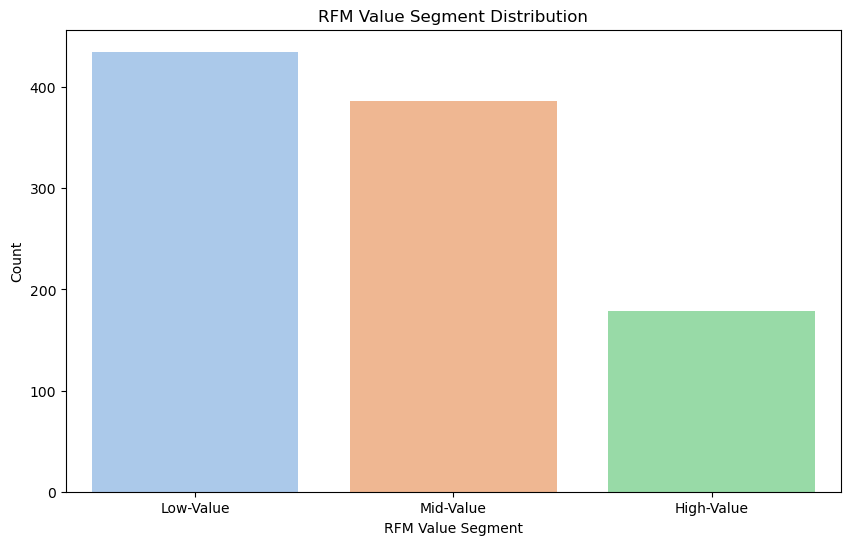

In [70]:
segment_counts = df['Value Segment'].value_counts().reset_index()
segment_counts.columns = ['Value Segment', 'Count']

pastel_colors = sns.color_palette('pastel')

plt.figure(figsize=(10,6))
sns.barplot(data = segment_counts, x = 'Value Segment', y = 'Count', palette= pastel_colors)

plt.title('RFM Value Segment Distribution')
plt.xlabel('RFM Value Segment')
plt.ylabel('Count')

plt.show()

### RFM Customer Segmentation

In [71]:
df['RFM Customer Segments'] = ''

df.loc[df['RFM_Score'] >= 9, 'RFM Customer Segments'] = 'Champions'
df.loc[(df['RFM_Score'] >= 6) & (df['RFM_Score'] < 9), 'RFM Customer Segments'] = 'Potential Loyalists'
df.loc[(df['RFM_Score'] >= 5) & (df['RFM_Score'] < 6), 'RFM Customer Segments'] = 'At-Risk Customers'
df.loc[(df['RFM_Score'] >= 4) & (df['RFM_Score'] < 5), 'RFM Customer Segments'] = 'Cannot Lose'
df.loc[(df['RFM_Score'] >= 3) & (df['RFM_Score'] < 4), 'RFM Customer Segments'] = 'Lost'

#### 1.Consumers with an RFM score of 9 or above are designated as ‘Champions,’ indicating that they are the most valued and engaged consumers.
#### 2.Those with scores of 6 to 8 are labelled as ‘Potential Loyalists,’ suggesting a high potential for loyalty and increased value
#### 3.Customers with scores of 5 or above are labeled as 'At-Risk Customers,’ indicating that they may be showing signs of decreased engagement.
#### 4.A score of roughly 4 indicates ‘Cannot Lose’ clients, who are still relatively important but require care to retent these customers.
#### 5.Finally, clients with an RFM score of 3 or lower are labeled as ‘Lost,’ indicating a lack of engagement and value.

## RFM Analysis

analysing the distribution of customers across several RFM customer segments within each value segment:

In [72]:
segment_product_counts = df.groupby(['Value Segment', 'RFM Customer Segments']).size().reset_index(name='Count')
segment_product_counts

,Value Segment,RFM Customer Segments,Count
0,Low-Value,At-Risk Customers,180
1,Low-Value,Cannot Lose,173
2,Low-Value,Champions,0
3,Low-Value,Lost,82
4,Low-Value,Potential Loyalists,0
5,Mid-Value,At-Risk Customers,0
6,Mid-Value,Cannot Lose,0
7,Mid-Value,Champions,0
8,Mid-Value,Lost,0
9,Mid-Value,Potential Loyalists,386


In [73]:
segment_product_counts = segment_product_counts.sort_values('Count', ascending= False)
segment_product_counts

,Value Segment,RFM Customer Segments,Count
9,Mid-Value,Potential Loyalists,386
0,Low-Value,At-Risk Customers,180
1,Low-Value,Cannot Lose,173
14,High-Value,Potential Loyalists,117
3,Low-Value,Lost,82
12,High-Value,Champions,62
2,Low-Value,Champions,0
4,Low-Value,Potential Loyalists,0
5,Mid-Value,At-Risk Customers,0
6,Mid-Value,Cannot Lose,0


In [74]:
segment_product_counts = segment_product_counts[segment_product_counts['Count'] > 1]
segment_product_counts

,Value Segment,RFM Customer Segments,Count
9,Mid-Value,Potential Loyalists,386
0,Low-Value,At-Risk Customers,180
1,Low-Value,Cannot Lose,173
14,High-Value,Potential Loyalists,117
3,Low-Value,Lost,82
12,High-Value,Champions,62


In [75]:
# segment_product_counts = df.groupby(['Value Segment', 'RFM Customer Segments']).size().reset_index(name = 'Count')
# segment_product_counts = segment_product_counts.sort_values('Count', ascending= False)
# segment_product_counts = segment_product_counts[segment_product_counts['Count'] > 1]

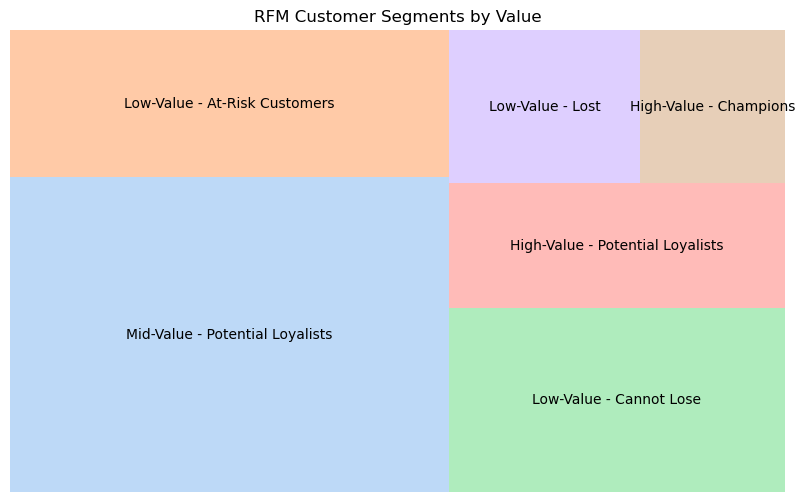

In [76]:
import squarify 
plt.figure(figsize=(10,6))

squarify.plot(sizes = segment_product_counts['Count'],
              label = segment_product_counts.apply(lambda x: f"{x['Value Segment']} - {x['RFM Customer Segments']}", axis= 1),
              color = pastel_colors, 
              alpha = 0.7)

plt.title('RFM Customer Segments by Value')
plt.axis('off')
plt.show()

### distribution of RFM values within the Champions segment:

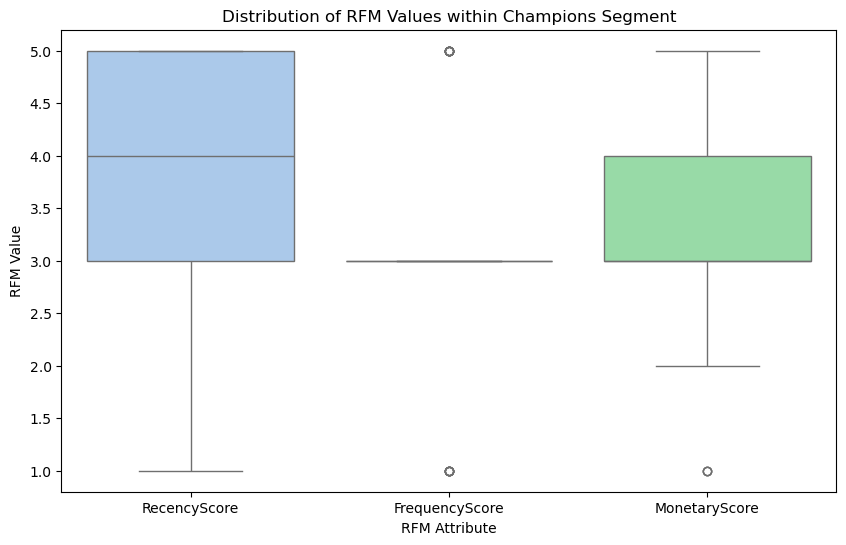

In [77]:
champions_segment = df[df['RFM Customer Segments'] == 'Champions']

plt.figure(figsize= (10,6))
sns.boxplot(data = champions_segment[['RecencyScore', 'FrequencyScore', 'MonetaryScore']], palette= 'pastel')

plt.title('Distribution of RFM Values within Champions Segment')
plt.xlabel('RFM Attribute')
plt.ylabel('RFM Value')

plt.show()

#### !!!!

### correlation between the champions’ recency, frequency, and monetary scores:

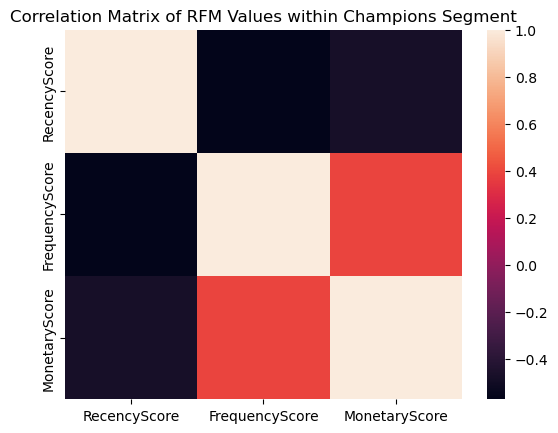

In [78]:
correlation_matrix = champions_segment[['RecencyScore','FrequencyScore', 'MonetaryScore']].corr()

sns.heatmap(data = correlation_matrix)
plt.title('Correlation Matrix of RFM Values within Champions Segment')

plt.show()

In [79]:
correlation_matrix

,RecencyScore,FrequencyScore,MonetaryScore
RecencyScore,1.000000,-0.571727,-0.474715
FrequencyScore,-0.571727,1.000000,0.390657
MonetaryScore,-0.474715,0.390657,1.000000


### Analysing the total number of customers in each segment:

C:\Users\User\AppData\Local\Temp\ipykernel_6464\2443194723.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = segment_counts.index, y=segment_counts.values, palette= 'pastel')


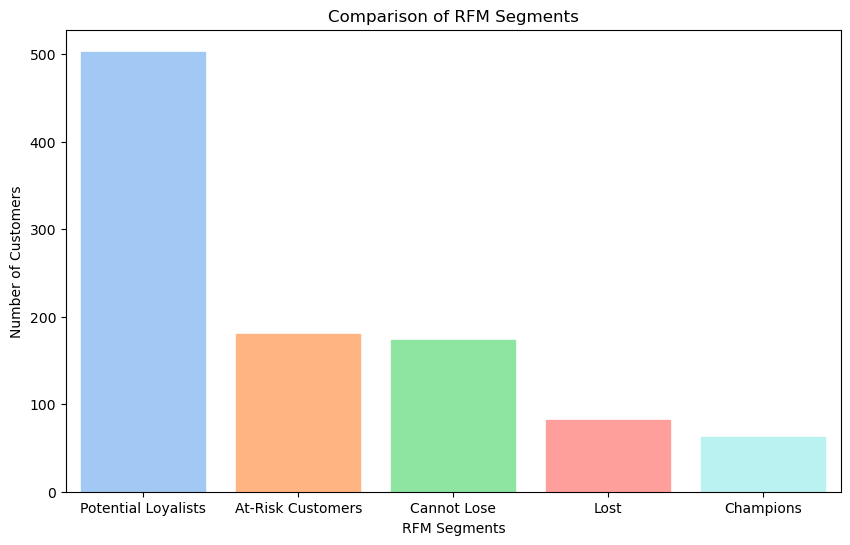

In [80]:
segment_counts = df['RFM Customer Segments'].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x = segment_counts.index, y=segment_counts.values, palette= 'pastel')

champions_color = pastel_colors[9]
colors = [champions_color if segment == 'Champions' else pastel_colors[i] for i, segment in enumerate(segment_counts.index)]
ax = plt.gca()
for i, bar in enumerate(ax.patches):
    bar.set_color(colors[i])

plt.title('Comparison of RFM Segments')
plt.xlabel('RFM Segments')
plt.ylabel('Number of Customers')

ax.yaxis.grid(False)

plt.show()

### !!!